In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook

In [2]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [3]:
#データにアクセス
data = hdu.data
## numpy.ndarray objectでデータを返す

#headerにアクセス
header = hdu.header
## astropy.io.fits.header.Headerでheaderを返す

In [4]:
cube = sc.read(hdu)

In [5]:
#速度範囲の切り出し
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

In [6]:
mom0 = subcube.moment(order=0)
mom1 = subcube.moment(order=1)
mom2 = subcube.moment(order=2)

In [7]:
# hduにする
hdu_mom1 = mom1.hdu
hdu_mom2 = mom2.hdu

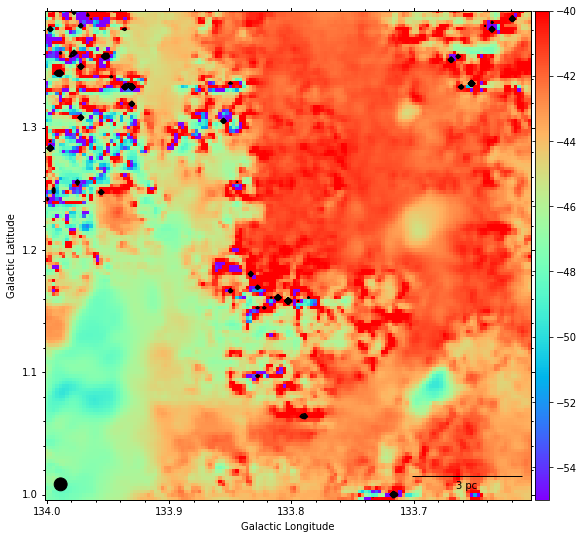

In [12]:
f1 = aplpy.FITSFigure(hdu_mom1)
f1.show_colorscale(vmax=-40, vmin=-55, cmap='rainbow')
# 軸の表記を変換
f1.set_xaxis_coord_type('scalar')
f1.set_yaxis_coord_type('scalar')

# カラーバー
f1.add_colorbar()

#contour
f1.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
f1.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f1.add_beam()
f1.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')

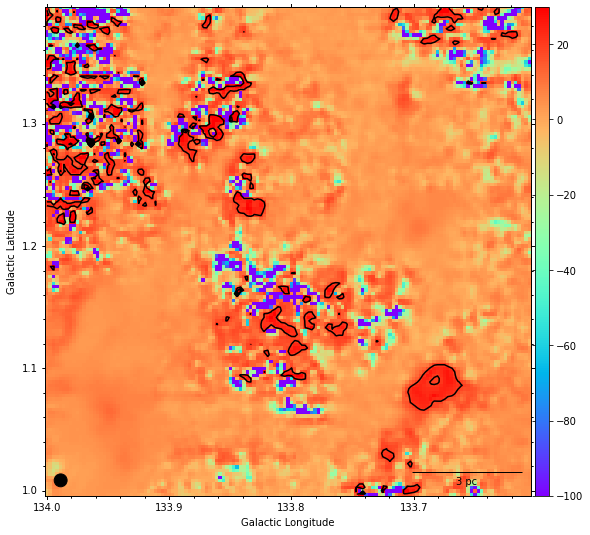

In [16]:
f2 = aplpy.FITSFigure(hdu_mom2)
f2.show_colorscale(vmax=-100, vmin=30, cmap='rainbow')
# 軸の表記を変換
f2.set_xaxis_coord_type('scalar')
f2.set_yaxis_coord_type('scalar')

# カラーバー
f2.add_colorbar()

#contour
f2.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
f2.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f2.add_beam()
f2.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')